**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did an excellent job! The project is accepted. Keep up the good work on the next sprint!

In [74]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import scipy.stats as stats

I will be analyzing 3 datasets that was collected previously using SQL. First I will clean and check these datasets to make sure there will be no missing values, data types are corrected, and columns are named correctly. From these, I will identity top taxi companies, dropoff locations, and whether the weather conditions affect ride times. 

## Checking up dataset #1

In [2]:
df1 = pd.read_csv('/datasets/project_sql_result_01.csv')
df1.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [3]:
#making sure if data type is corrected for each column
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
#checking for missing or null values 
df1.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [5]:
#checking for duplicates 
df1.duplicated().sum()

0

The first data set with columns company name and trips amount have the correct data type. There are no missing values or duplicated. So I will leave it as it is. 

## Checking Dataset #2 

In [7]:
df2=pd.read_csv('/datasets/project_sql_result_04.csv')
df2.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [8]:
#making sure if data type is corrected for each column
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [12]:
#checking for missing or null values 
df2.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [11]:
#checking for duplicates
df2.duplicated().sum()

0

The second data set with columns dropoff_location_name and average_trips  have the correct data type. They are also named correctly. There are no missing values or duplicated. So I will leave it as it is.

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was loaded and inspected!

</div>

## identify the top 10 neighborhoods in terms of drop-offs

In [25]:
top_dropoffs = df2[['dropoff_location_name','average_trips']].sort_values(by='average_trips',ascending=False).head(10)
top_dropoffs

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


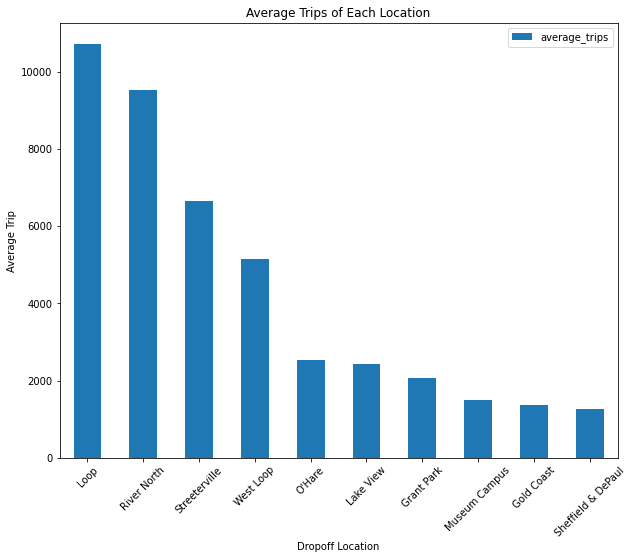

In [42]:
top_dropoffs.plot(kind='bar',x='dropoff_location_name', y='average_trips',xlabel='Dropoff Location', 
                  ylabel='Average Trip', title='Average Trips of Each Location', figsize=[10,8])
plt.xticks(rotation=45)
plt.show()

The graph displays the top 10 dropoff locations with Loop as the highest location with an average trip with 10,727. The smallest average of the top 10 is Sheffield & DePaul with an average of 1,260 trips. 

## Top taxi companies 

In [44]:
df1['company_name'].unique()

array(['Flash Cab', 'Taxi Affiliation Services', 'Medallion Leasing',
       'Yellow Cab', 'Taxi Affiliation Service Yellow',
       'Chicago Carriage Cab Corp', 'City Service', 'Sun Taxi',
       'Star North Management LLC', 'Blue Ribbon Taxi Association Inc.',
       'Choice Taxi Association', 'Globe Taxi',
       'Dispatch Taxi Affiliation', 'Nova Taxi Affiliation Llc',
       'Patriot Taxi Dba Peace Taxi Association',
       'Checker Taxi Affiliation', 'Blue Diamond',
       'Chicago Medallion Management', '24 Seven Taxi',
       'Chicago Medallion Leasing INC', 'Checker Taxi', 'American United',
       'Chicago Independents', 'KOAM Taxi Association', 'Chicago Taxicab',
       'Top Cab Affiliation', 'Gold Coast Taxi',
       'Service Taxi Association', '5 Star Taxi', '303 Taxi',
       'Setare Inc', 'American United Taxi Affiliation', 'Leonard Cab Co',
       'Metro Jet Taxi A', 'Norshore Cab', '6742 - 83735 Tasha Ride Inc',
       '3591 - 63480 Chuks Cab', '1469 - 64126 Omar Jada'

In [45]:
top_company = df1[['company_name','trips_amount']].sort_values(by='trips_amount',ascending=False).head(10)
top_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


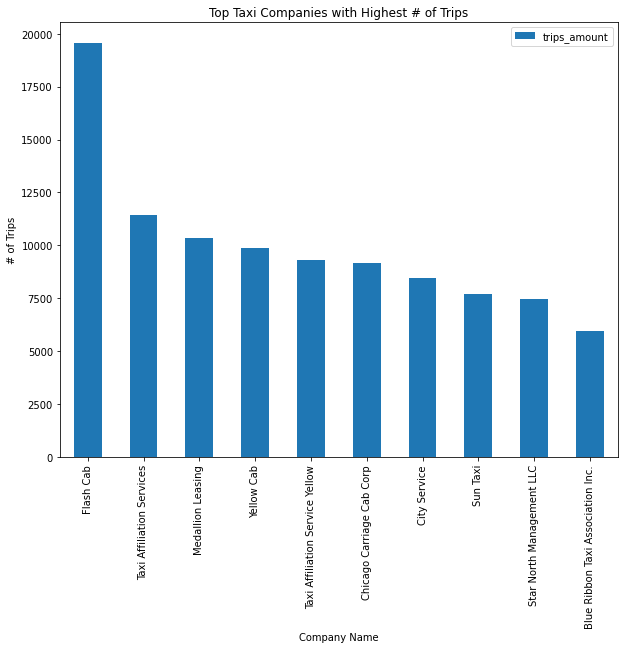

In [55]:
#plot to have a better visualizaton 
top_company.plot(kind='bar',x='company_name', y='trips_amount', xlabel='Company Name', ylabel='# of Trips', 
                 title='Top Taxi Companies with Highest # of Trips', figsize=[10,8])
plt.show()

The graph display the top 10 taxi companies with the most trips. The highest one is Flash Cab with almost 20,000 trips. It is almost as doubled as most of the companies in the top 10. 

<div class="alert alert-success">
<b>Reviewer's comment</b>

Top taxi companies and dropoff locations were identified successfully!

</div>

## Checking dataset #3

In [57]:
df3 = pd.read_csv('/datasets/project_sql_result_07.csv')
df3.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [58]:
#checking datatype 
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [61]:
#changing start_ts into datetime: 
df3['start_ts']=pd.to_datetime(df3['start_ts'], format='%Y-%m-%dT%H:%M:%S')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [62]:
#checking for missing or null values
df3.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

The dataset #3 has the correct columns formats; all in lower case. There is no missing values. I did not check for duplicated values because it is expected to have duplicated values in columns weather_conditions and start_ts. I changed start_ts from object to datetime64 with to_datetime() method. 

<div class="alert alert-success">
<b>Reviewer's comment</b>

Alright!

</div>

## Testing Hypothesis 

testing for "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

In [66]:
df3['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

In [70]:
good_conditions=df3[df3['weather_conditions']=='Good']['duration_seconds']
bad_conditions=df3[df3['weather_conditions']=='Bad']['duration_seconds']

In [75]:
# Setting the alpha value = .05
# Setting Null Hypothesis (H0) = the average duration of rides from the Loop to O'Hare International on rainy Saturday 
#is equal to non rainy Saturdays
#Setting Alternative Hypothesis (HA) = the average duration of rides from the Loop to O'Hare International Airport 
#changes on rainy Saturdays.
alpha = .05

results = st.ttest_ind(good_conditions, bad_conditions)

print('p-value:', results.pvalue)

if results.pvalue < alpha: 
    print('we reject the null hypothesis')
else: 
    print('we cannot reject the null hypothesis')

p-value: 6.517970327099473e-12
we reject the null hypothesis


I set my alpha value at .05 because it is a standard and traditional significant value when performing hypothesis test. H0 is set equal to rainy days and non rainy days on Saturday because the null hypothesis should always include the equal sign. The alternative is just the opposite of the null hypothesis. The calculated p-value is 6.5e-12. Since it is smaller than the alpha value. We reject the null hypothesis.

<div class="alert alert-success">
<b>Reviewer's comment</b>

The null and alternative hypotheses were formulated correctly, an appropriate test was used and the conclusion is consistent with test results

</div>

Conclusion: From the analysis, the top 10 taxi companies are Flash Cab, Taxi Affiliation Services, Medallion Leasing, Yellow Cab, Taxi Affiliation Servie Yellow, Chicago Carriage Cab Corp, City Servie, Sun Taxi, Star North Management, and Blue Ribbon Taxi Association. With Flash Cab being the highest with almost 20,000 rides. The top dropoff location is Loop with over 10,000 average rides, while the rest of the dropoff locations is less than 10,000. A hypothesis test was done to see if "the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays". The H0 is the average duration of rides from the Loop to O'Hare International on rainy Saturday is equal to non rainy (good weather) Saturdays. The p-value is way smaller than the significance value; therefore we reject the null hypothesis and accept the alternative hypothesis at the significance value of .05.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Very good!

</div>